# MDb Movies Dataset - Data Exploration, Visualization, and Cleaning and Models Training

The following is the Jupyter notebook that contains the data exploration, visualization, and cleaning of the IMDb movies dataset that I have been working on for the past couple of weeks. Moreover, I include models training and hyperaparameters tuning to increase the accuracy of the predictions of the models.

I tried to provide detailed comments on each information that I got from exploring and visualizng the data. Moreover, I justified the choices I made when cleaning the data.

Additionally, I train a baseline model that is used to make predictions on the test set. The Root Mean Squared Error (RMSE)  of this model is calculated; thus, they will serve as the loss functions that all models try to minimize. 

Finally, I train other models and choose the one with the best RMSE.

A list of references can be found at the bottom of the notebook.

## Problem Statement

The goal is to train a regression model to predict the total gross of movies. 

## Data Loading

In [2]:
import os
import pandas as pd
import urllib.request
import requests

def load_movies_dataset():
    github_url = "https://raw.githubusercontent.com/dmml-heriot-watt/group-coursework-ha/main/data/IMDb_All_Genres_etf_clean1.csv?token=GHSAT0AAAAAACIDJMTW7T5ITSFOALHDTH56ZJZECXQ"
    requests.get(github_url)
    return pd.read_csv(github_url)

In [3]:
movies = load_movies_dataset()
movies

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"


## A Quick Look at the Data

We will start by taking a quick look at the data. We don't want to explore the data in-depth, as we eventually want to split it into a training set and a testing set. Nontheless, we would like to get a general outlook of the dataset.

In [4]:
movies.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


We can get information about the dataset and the types of the attributes it contains:

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


There are 5,562 instances in the dataset. None of the attributes has any missing rows. We also note that not all attributes are numerical. The non-numerical attributes are:

Movie_Title, Director, Actors, Censor, Total_Gross, main_genre, and side_genre. 

We can further explore these attributes.

We are especially concerned with the target variable, "Total_Gross", which is non-numerical. We have to deal with this before processing the data. 

In [6]:
movies["Total_Gross"].value_counts()

Gross Unkown    861
$0.01M           25
$0.02M           22
$0.04M           22
$0.03M           21
               ... 
$1.13M            1
$28.87M           1
$21.08M           1
$44.18M           1
$9.11M            1
Name: Total_Gross, Length: 3501, dtype: int64

We can notice the following:

* The values of this target variable has the following format "$X.YZM". 
* There are 861 entries with the value "Gross Unknown".

Let us use Pandas and a Lambda function to convert the format to a float if the total gross is known and to convert that value to np.nan if the total gross = "Gross Unknown".

In [7]:
import numpy as np
movies["Total_Gross"] = movies["Total_Gross"].apply(lambda x: float(x.replace("$","").replace("M",""))*1000000 if x!="Gross Unkown" else np.nan )

Let us drop NANs:

In [8]:
movies.dropna(subset=["Total_Gross"], inplace=True)

Let us double-check that the changes have been applied:

In [9]:
movies["Total_Gross"].value_counts()

10000.0       25
40000.0       22
20000.0       22
30000.0       21
50000.0       18
              ..
28870000.0     1
21080000.0     1
44180000.0     1
2420000.0      1
9110000.0      1
Name: Total_Gross, Length: 3500, dtype: int64

Our target label looks greate and clean!

Let us explore the rest of the non-numerical attributes:

In [10]:
movies["Censor"].value_counts()

UA           1003
A             972
U             931
R             818
PG-13         380
Not Rated     303
PG            117
18             64
16             27
13             19
15+            16
UA 16+          9
7               9
G               8
(Banned)        7
All             4
UA 13+          3
Unrated         3
12+             2
U/A             2
UA 7+           2
M/PG            1
NC-17           1
Name: Censor, dtype: int64

It is important to note that UA and U are not the same, and neither are UA and UA 13+. We can't just eliminate UA 13+ and U and replace them with UA's to simplify the data. This will overfit our model on the training set and will (highly likely) perform terrible on the test set. 

In [11]:
movies["main_genre"].value_counts()

Action       1326
Comedy       1203
Drama         828
Crime         355
Biography     302
Animation     279
Adventure     263
Horror        108
Mystery        19
Fantasy        11
Western         4
Film-Noir       3
Name: main_genre, dtype: int64

Genre plays an important role in a movie's total gross. *Action* movies tend to perform the best [1]. 

We can investigate the movies with the best Box Office performance: 

In [12]:
high_gross_movies = movies[movies['Total_Gross'] > 50000000]

In [13]:
genre_movie_counts = high_gross_movies["main_genre"].value_counts().reset_index()
genre_movie_counts.columns = ["main_genre", "Frequency"]

# Investigate:
genre_movie_counts

,main_genre,Frequency
0,Action,602
1,Comedy,382
2,Animation,185
3,Drama,173
4,Adventure,104
5,Biography,73
6,Crime,65
7,Horror,38
8,Mystery,5
9,Fantasy,4


As expected! We will use an *OrdinalEncoder*, insteand of one-hot encoding, to encode the "main_genre" attribute. Let us keep a list of the desired ordering:

In [14]:
ordered_genre = [["Action", "Comedy", "Animation", "Drama", "Adventure", "Biography", "Crime", "Horror", "Mystery", "Fantasy", "Western", "Film-Noir"]]
ordered_genre

[['Action',
  'Comedy',
  'Animation',
  'Drama',
  'Adventure',
  'Biography',
  'Crime',
  'Horror',
  'Mystery',
  'Fantasy',
  'Western',
  'Film-Noir']]

In [15]:
movies["side_genre"].value_counts()

 Drama,  Romance       288
 Adventure,  Comedy    270
 Romance               269
 Drama                 265
 Crime,  Drama         254
                      ... 
 Mystery,  War           1
 Action,  Comedy         1
 Adventure,  War         1
 Fantasy,  War           1
 Fantasy,  Musical       1
Name: side_genre, Length: 140, dtype: int64

In [16]:
movies["Director"].value_counts()

Woody Allen                            37
Clint Eastwood                         30
Steven Spielberg                       27
Ron Howard                             22
Martin Scorsese                        21
                                       ..
George Scribner                         1
Directors:Eric Darnell, Tim Johnson     1
Gil Kenan                               1
Chris Miller                            1
Tom Putnam                              1
Name: Director, Length: 1921, dtype: int64

In [17]:
movies["Actors"].value_counts()

William Shatner, Leonard Nimoy, DeForest Kelley, James Doohan           6
Sylvester Stallone, Talia Shire, Burt Young, Carl Weathers              3
Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving        3
Patrick Stewart, Jonathan Frakes, Brent Spiner, LeVar Burton            3
Sandra Bullock, Michael McDonald, Melissa McCarthy, Demián Bichir       2
                                                                       ..
Jennifer Lopez, Edward James Olmos, Jon Seda, Jackie Guerra             1
Robin Williams, Daniel London, Monica Potter, Philip Seymour Hoffman    1
Christian Bale, Cate Blanchett, Heath Ledger, Ben Whishaw               1
Cate Blanchett, Clive Owen, Geoffrey Rush, Jordi Mollà                  1
Jon Voight, Scott Baio, Vanessa Angel, Skyler Shaye                     1
Name: Actors, Length: 4654, dtype: int64

The following attributes will be OneHotEncoded:

* "Actors"
* "Director"
* "side_genre"
* "Censor"

Finally, the last non-numerical attribute is "Movie_Title":

In [18]:
movies["Movie_Title"].value_counts()

Robin Hood                      3
Taxi                            3
Aladdin                         2
RoboCop                         2
The Lion King                   2
                               ..
Patch Adams                     1
Selena                          1
Bugsy                           1
Battle of the Sexes             1
Superbabies: Baby Geniuses 2    1
Name: Movie_Title, Length: 4628, dtype: int64

We have two choices:
   * Keep the data by encoding it with a OneHotEncoder. This will overblow the size of the matrix and will slow down our models. I have tried this before, but found no significant improvement in the accuracy of the prediction of any of the models (I have verified this using *feature_importances_*, which I will show how to do later).
   * Entirely drop the attribute. This will make our models run faster and there is no loss in prediction accuracy. I will go with this approach.

In [19]:
movies = movies.drop("Movie_Title", axis=1)

In [20]:
movies

,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
1,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534860000.0,Action,"Crime, Drama"
2,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377850000.0,Action,"Adventure, Drama"
3,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,292580000.0,Action,"Adventure, Sci-Fi"
4,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,342550000.0,Action,"Adventure, Drama"
5,2001,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,178,U,315540000.0,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...
5555,2005,Lawrence Guterman,"Jamie Kennedy, Traylor Howard, Alan Cumming, L...",2.2,94,U,17020000.0,Comedy,"Family, Fantasy"
5557,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,14190000.0,Comedy,Sci-Fi
5558,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,30000.0,Comedy,Romance
5559,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,4920000.0,Comedy,"Musical, Romance"


Let us plot histograms of the numerical attributes:

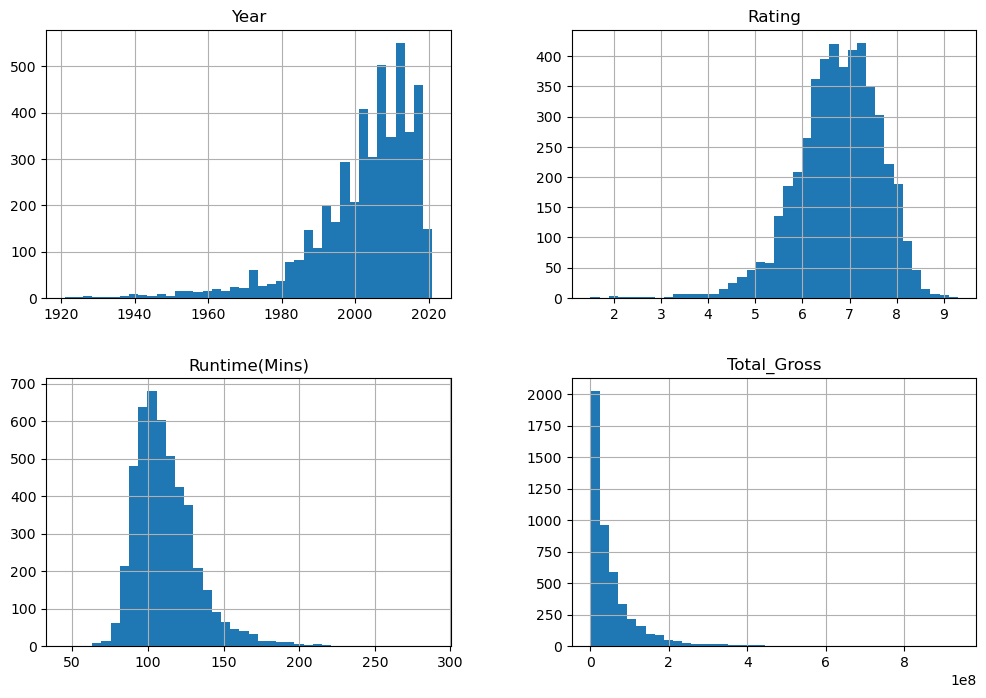

In [21]:
import matplotlib.pyplot as plt
movies.hist(bins=40, figsize=(12, 8))
plt.show()

The following attributes have heavy-tail distribution:

* "Year": left-skewed 
* "Runtime(Mins)": right-skewed 
* "Total_Gross": right-skewed 

We can apply transformations to these attribute to make thir distribution more symmetrical and bell-shaped.

* The "Rating" attribute has a distribution that is normal.

One final thing to do is to adjust the "Total_Gross" values for inflation. This is important so our final ML model will be useful.

There are a couple of ways to do this. I followed the approach outlined in [2]. I simply downloaded the data as a csv from: https://www.in2013dollars.com/us/inflation/1930?amount=1.

In [82]:
inflation_data = pd.read_csv("C:\\Users\\Rami\\Downloads\\inflation_data.csv")  
inflation_data.head()

,year,amount,inflation rate
0,1930,1.00,-0.02
1,1931,0.91,-0.09
2,1932,0.82,-0.10
3,1933,0.78,-0.05
4,1934,0.80,0.03


Let us now use this DataFrame to adjust the "Total_Gross" of our movies DataFrame:

In [23]:
movies = movies.merge(inflation_data, left_on="Year", right_on="year", how="left")

# A function to make inflation adjustemetn easier
def adjust_for_inflation(row):
    if pd.notna(row["inflation rate"]):
        inflation_factor = 1 + (row["inflation rate"] / 100) 
        return row["Total_Gross"] / inflation_factor
    else:
        return row["Total_Gross"]
    
# We can apply the function now to our "Total_Gross" column    
movies["Adjusted_Total_Gross"] = movies.apply(adjust_for_inflation, axis=1)

# Verify the everything works:
movies[["Total_Gross", "Adjusted_Total_Gross"]]

,Total_Gross,Adjusted_Total_Gross
0,534860000.0,5.346461e+08
1,377850000.0,3.777744e+08
2,292580000.0,2.925215e+08
3,342550000.0,3.424815e+08
4,315540000.0,3.154454e+08
...,...,...
4696,17020000.0,1.701490e+07
4697,14190000.0,1.418433e+07
4698,30000.0,2.998800e+04
4699,4920000.0,4.919016e+06


In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 4700
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  4701 non-null   int64  
 1   Director              4701 non-null   object 
 2   Actors                4701 non-null   object 
 3   Rating                4701 non-null   float64
 4   Runtime(Mins)         4701 non-null   int64  
 5   Censor                4701 non-null   object 
 6   Total_Gross           4701 non-null   float64
 7   main_genre            4701 non-null   object 
 8   side_genre            4701 non-null   object 
 9   year                  4693 non-null   float64
 10  amount                4693 non-null   float64
 11  inflation rate        4693 non-null   float64
 12  Adjusted_Total_Gross  4701 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 514.2+ KB


Let us drop the original "Total_Gross" and replace it with the adjusted one:

In [25]:
# Drop original "Total_Gross"
movies.drop(columns=["Total_Gross"], inplace=True)

# Rename the adjusted columns
movies.rename(columns={"Adjusted_Total_Gross": "Total_Gross"}, inplace=True)
movies.dropna(subset=["Total_Gross"], inplace=True)

# Drop the rest of the augmented attributes
movies = movies.drop("inflation rate", axis=1)
movies = movies.drop("year", axis=1)
movies = movies.drop("amount", axis=1)

movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 4700
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4701 non-null   int64  
 1   Director       4701 non-null   object 
 2   Actors         4701 non-null   object 
 3   Rating         4701 non-null   float64
 4   Runtime(Mins)  4701 non-null   int64  
 5   Censor         4701 non-null   object 
 6   main_genre     4701 non-null   object 
 7   side_genre     4701 non-null   object 
 8   Total_Gross    4701 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 367.3+ KB


## Handling Outliers

It is important to handle outliers to increase the accuracy of our prediction models. One way to handle outliers is to get rid of the a small percentage from the top and the bottom of the dataset distribution. This is known as the *Interquartile Range Method* [3].

In [26]:
q_low = movies["Total_Gross"].quantile(0.015)
q_hi = movies["Total_Gross"].quantile(0.985)

movies = movies[(movies["Total_Gross"] < q_hi) & (movies["Total_Gross"] > q_low)]

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 2 to 4700
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4551 non-null   int64  
 1   Director       4551 non-null   object 
 2   Actors         4551 non-null   object 
 3   Rating         4551 non-null   float64
 4   Runtime(Mins)  4551 non-null   int64  
 5   Censor         4551 non-null   object 
 6   main_genre     4551 non-null   object 
 7   side_genre     4551 non-null   object 
 8   Total_Gross    4551 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 355.5+ KB


## Create a Test Set

Before further data exploration and visualization, it is important to spearate the dataset into a testing set and a training set. This is to avoid noticing any patterns in the testing set, which may lead us to select a particular ML model, and we may end up with a model that is too optimistic and bad at generalization.

We would rather split the dataset via stratified sampling. This is to to guarantee that the test set is representative of the overall population (dataset).

I chose to do stratified sampling based on a newly created category: "Total_Gross_Category".

Let's create this category first:

In [28]:
movies["Total_Gross"].describe()

count    4.551000e+03
mean     4.829837e+07
std      5.540752e+07
min      3.000000e+04
25%      7.763447e+06
50%      3.103379e+07
75%      6.618176e+07
max      3.182827e+08
Name: Total_Gross, dtype: float64

In [29]:
movies["Total_Gross_Category"] = pd.cut(
    movies["Total_Gross"],
    bins=[0, 5000000, 30000000, 67000000, np.inf],
    labels=[1, 2, 3, 4],
    include_lowest=True
)

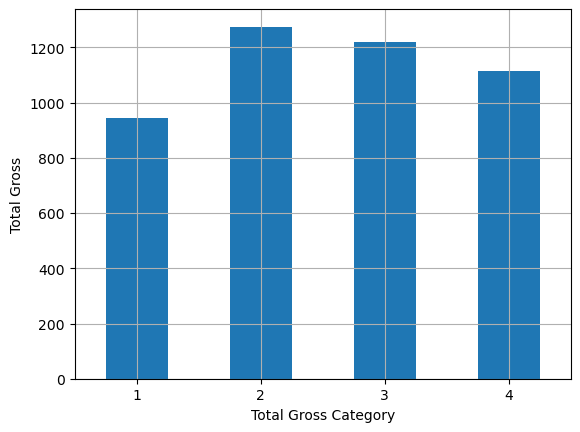

In [30]:
movies["Total_Gross_Category"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Total Gross Category")
plt.ylabel("Total Gross")
plt.show()

Splitting the dataset based on stratified sampling:

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

# Reset the index of the df (this overcomes the KeyError)
movies = movies.reset_index(drop=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(movies, movies['Total_Gross_Category']):
    strat_train_set = movies.loc[train_index]
    strat_test_set = movies.loc[test_index]

We drop the "Total_Gross_Category" because we won't need it anymore:

In [32]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("Total_Gross_Category", axis=1, inplace=True)

## Further Data Exploration and Visualization

We will dive in depth into exploring and visualizing our data. Since our training set is small, we can directly work on it. We will eventually using transformations on the full training set, so we start by making a copy of it:

In [33]:
movies = strat_train_set.copy()

## Inestigate Correlations

In [34]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 1395 to 658
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           3640 non-null   int64  
 1   Director       3640 non-null   object 
 2   Actors         3640 non-null   object 
 3   Rating         3640 non-null   float64
 4   Runtime(Mins)  3640 non-null   int64  
 5   Censor         3640 non-null   object 
 6   main_genre     3640 non-null   object 
 7   side_genre     3640 non-null   object 
 8   Total_Gross    3640 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 284.4+ KB


We start by looking for correlations. We will compute the standard correlation coefficient:

In [35]:
corr_matrix = movies.corr()
corr_matrix["Total_Gross"].sort_values(ascending=False)

C:\Users\Rami\AppData\Local\Temp\ipykernel_3780\4019769235.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movies.corr()


Total_Gross      1.000000
Runtime(Mins)    0.107817
Year             0.081903
Rating           0.019155
Name: Total_Gross, dtype: float64

We can also investigate correlation between attributes using a scatter matrix, which is a plot of every numerical attribute against every other numerical attribute.

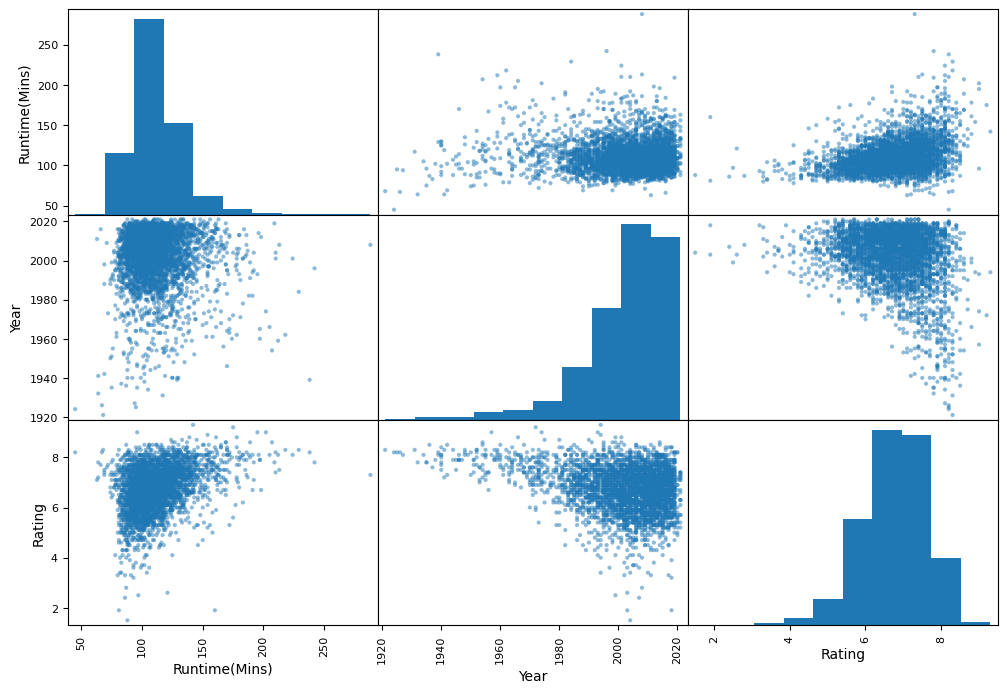

In [36]:
from pandas.plotting import scatter_matrix
attributes = ["Runtime(Mins)", "Year", "Rating", "Actors"]
scatter_matrix(movies[attributes], figsize=(12, 8))
plt.show()

Here we can experiment with adding more attributes to our dataset. We might do this later.

## Prepare the Data for ML

We revert to a clean training set, and separate the predictors and the labels. This is because we don't want to apply transformations that we will apply to the predictors on the labels.

In [37]:
movies = strat_train_set
movies = movies.drop("Total_Gross", axis=1)
movies_labels = strat_train_set["Total_Gross"].copy()

movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 1395 to 658
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           3640 non-null   int64  
 1   Director       3640 non-null   object 
 2   Actors         3640 non-null   object 
 3   Rating         3640 non-null   float64
 4   Runtime(Mins)  3640 non-null   int64  
 5   Censor         3640 non-null   object 
 6   main_genre     3640 non-null   object 
 7   side_genre     3640 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 255.9+ KB


## Feature Scaling and the Transformation Pipeline

We recall our historgram plots that we did earlier.

We notice that the input numerical attributes have very different scales. If we don't do feature scaling, most ML models will be biased toward ignoring some of our attributes' values.

Since the two attributes, "Year" and "Runtime(Mins)", have a distribution that is heavy tail (see histogram above), we should first transform the features before scaling them. The goal is to make the distribution of any attribute symmetric.

The appropriate transformation to make is the log transformation: we replace the feature with its logarithm. Then, I have found that applying a *MinMaxScaler()* for log-transformed attribute gives better results that a *StandardScaler()*, so I will go with that here. 

Another scaler we can use is the *MaxAbsScaler()*. It is appropriate to use to scale sparse data (as in our case). We use this for attributes that will no undergo a log transformation.

I have also tried using a *RobustScaler()*, but that did not help much.

Recall that we also said we will apply a "OneHotEncoder()" to most of our non-numerical attributes, and that we will apply an "OrdinalEncoder()" to our "main_genre" attribute. This can also be done in the pipeline.

In [38]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MaxAbsScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.preprocessing import MinMaxScaler, RobustScaler

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    MinMaxScaler()
)

default_num_pipeline = make_pipeline(
    MaxAbsScaler(),
    StandardScaler()
)

genre_pipeline = make_pipeline(
    OrdinalEncoder(categories=ordered_genre)
)
cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing = ColumnTransformer([
        ("log", log_pipeline, ["Year", "Runtime(Mins)"]),
        ("genre_ordinal", genre_pipeline, ["main_genre"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

Let us fit and transform our training set:

In [39]:
movies_prepared = preprocessing.fit_transform(movies)
movies_prepared.shapemovies_prepared = preprocessing.fit_transform(movies)

In [40]:
movies_prepared

<3640x5461 sparse matrix of type '<class 'numpy.float64'>'
	with 31747 stored elements in Compressed Sparse Row format>

## Select and Train a Base Model

Before trying a Decision Tree model (and other Ensembles that leverage it), and tuning their hyperparameters and so on, I would like to start by training a Linear Regression model. This will serve as a quick model that other models can be compared to. Moreover, it is an easy hack to allow me to test that my data preparation and cleaning were done correctly.

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(movies, movies_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('maxabsscaler',
                                                              MaxAbsScaler()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Runtime(Mins)']),
                                                 ('genre_...
                                                                   OrdinalEncoder(categories=[['Action',
                                                                                               'Comedy',
                                                                                               'Animation',
                                                                                               'Drama',
                                                                                               'Adventure',
                                                                                               'Biography',
                                                                                               'Crime',
                                                                                               'Horror',
                                                                                               'Mystery',
                                                                                               'Fantasy',
                                                                                               'Western',
                                                                                               'Film-Noir']]))]),
                                                  ['main_genre']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000181F0253750>)])),
                ('linearregression', LinearRegression())])

In [42]:
movies_predictions = lin_reg.predict(movies)
movies_predictions[:5].round(-2)

array([20183900.,  2549800.,  3139300., 30154200.,  9450000.])

In [43]:
movies_labels.iloc[:5].values

array([20183944.81655503,  2549745.02549745,  3139372.12557488,
       30153969.20615877,  9450000.        ])

We can evaluate the Linear Regression model's performance on the trainign set:

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_rmse = mean_squared_error(movies_labels, movies_predictions, squared=False)
lin_rmse

136498.50168561173

We have to use Cross Validation, because it is more accurate:

In [45]:
from sklearn.model_selection import cross_val_score
lin_rmses = -cross_val_score(lin_reg, movies, movies_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    1.000000e+01
mean     7.110150e+07
std      1.288788e+07
min      5.602761e+07
25%      6.195788e+07
50%      6.933641e+07
75%      7.914082e+07
max      9.609973e+07
dtype: float64

The true mean of the labels is:

In [46]:
movies_labels.mean()

48655262.49087419

Thus, the normalized RMSE (NRMSE) and the NMAE are:

In [47]:
print("NRMSE of Linear Regression = ", lin_rmses.mean() / movies_labels.mean())
print("MAE of Linear Regression = ", mean_absolute_error(movies_labels, movies_predictions))
print("NMAE Of Linear Regression (Testing Set) = ", mean_absolute_error(movies_labels, movies_predictions) / movies_labels.mean())


NRMSE of Linear Regression =  1.46133213047471
MAE of Linear Regression =  6173.417984456401
NMAE Of Linear Regression (Testing Set) =  0.0001268807867517782


## Experiment with Other Models

Let us no explore other models.

We start with a Decision Tree:

In [65]:
from sklearn.tree import DecisionTreeRegressor

dt_tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
dt_tree_reg.fit(movies, movies_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('maxabsscaler',
                                                              MaxAbsScaler()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Runtime(Mins)']),
                                                 ('genre_...
                                                                                               'Drama',
                                                                                               'Adventure',
                                                                                               'Biography',
                                                                                               'Crime',
                                                                                               'Horror',
                                                                                               'Mystery',
                                                                                               'Fantasy',
                                                                                               'Western',
                                                                                               'Film-Noir']]))]),
                                                  ['main_genre']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000181F0253750>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [66]:
movies_predictions = dt_tree_reg.predict(movies)
tree_rmses = -cross_val_score(dt_tree_reg, movies, movies_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()

count    1.000000e+01
mean     5.612933e+07
std      5.036673e+06
min      4.920636e+07
25%      5.338644e+07
50%      5.558508e+07
75%      5.773547e+07
max      6.730211e+07
dtype: float64

In [59]:
print("NRMSE = ", tree_rmses.mean() / movies_labels.mean())

NRMSE =  1.1536128272789317


The Decision Tree performs better than the Linear Regression model.

Let us try a Random Forest model:

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                          RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, movies, movies_labels,
                               scoring="neg_root_mean_squared_error",
                                cv=10,
                                n_jobs=-1)
pd.Series(forest_rmses).describe()

count    1.000000e+01
mean     4.599208e+07
std      3.211302e+06
min      3.959390e+07
25%      4.526421e+07
50%      4.570571e+07
75%      4.730843e+07
max      5.228159e+07
dtype: float64

In [63]:
print("NRMSE of Linear Regression = ", forest_rmses.mean() / movies_labels.mean())

NRMSE of Linear Regression =  0.9452643432290282


This is way better than a Linear Regression model or a Decision Tree Model!

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gbdt_reg = make_pipeline(preprocessing, GradientBoostingRegressor(
    loss='squared_error',
    random_state=42))
gbdt_rmses = -cross_val_score(gbdt_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
pd.Series(gbdt_rmses).describe()

count    1.000000e+01
mean     4.724435e+07
std      2.965439e+06
min      4.069145e+07
25%      4.612357e+07
50%      4.792359e+07
75%      4.845839e+07
max      5.193274e+07
dtype: float64

GradBoost did not perform as good as a Random Forest. 

## Hyperparameter Tuning

We can use Random Search to tune our hyperparameters.

In [48]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

I have tried this before. It takes sometime to run. I then used the *best_params_* and obtained the following:

{'random_forest__max_depth': 1308,
 'random_forest__max_features': 3,
 'random_forest__n_estimators': 1343}

In [68]:
'''
param_distribs = {'random_forest__max_features': randint(low=2, high=20),
                 'random_forest__max_depth': randint(low=1000, high=2000),
                 'random_forest__n_estimators': randint(low=1000, high=1500)}

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)

rnd_search.fit(movies, movies_labels)

rnd_search.best_params_
'''


'\nparam_distribs = {\'random_forest__max_features\': randint(low=2, high=20),\n                 \'random_forest__max_depth\': randint(low=1000, high=2000),\n                 \'random_forest__n_estimators\': randint(low=1000, high=1500)}\n\nfull_pipeline = Pipeline([\n    ("preprocessing", preprocessing),\n    ("random_forest", RandomForestRegressor(random_state=42)),\n])\n\nrnd_search = RandomizedSearchCV(\n    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,\n    scoring=\'neg_root_mean_squared_error\', random_state=42, n_jobs=-1)\n\nrnd_search.fit(movies, movies_labels)\n\nrnd_search.best_params_\n'

We can try the best parameters on the training set:

In [73]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(max_depth=1308,
                                                 max_features=3,
                                                 n_estimators=1343,
                                                 random_state=42,
                                                 n_jobs=-1))
forest_rmses = -cross_val_score(forest_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
pd.Series(forest_rmses).describe()

count    1.000000e+01
mean     4.414694e+07
std      2.340329e+06
min      3.893200e+07
25%      4.315902e+07
50%      4.473048e+07
75%      4.503967e+07
max      4.784781e+07
dtype: float64

In [71]:
print("NRMSE = ", forest_rmses.mean() / movies_labels.mean())

NRMSE =  0.9073416014602346


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("GBDT", GradientBoostingRegressor()),
])

param_distribs = {
                 'GBDT__loss': ["squared_error"],
                 'GBDT__learning_rate': [0.1, 0.2],
                 'GBDT__max_depth': randint(low=20, high=40),
                 'GBDT__n_estimators': randint(low=1800, high=2300)}

In [51]:
rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)

In [52]:
rnd_search.fit(movies, movies_labels)
rnd_search.best_params_

{'GBDT__learning_rate': 0.2,
 'GBDT__loss': 'squared_error',
 'GBDT__max_depth': 22,
 'GBDT__n_estimators': 1949}

In [56]:
GBDT_reg = make_pipeline(preprocessing,
                           GradientBoostingRegressor(
                               loss="squared_error",
                               learning_rate=0.2,
                               max_depth=22,
                               n_estimators=1949)
                           )
GBDT_rmses = -cross_val_score(GBDT_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
pd.Series(GBDT_rmses).describe()

count    1.000000e+01
mean     4.576612e+07
std      3.346544e+06
min      3.998943e+07
25%      4.455140e+07
50%      4.563964e+07
75%      4.759762e+07
max      5.225986e+07
dtype: float64

In [57]:
print("NRMSE = ", GBDT_rmses.mean() / movies_labels.mean())

NRMSE =  0.940620078792883


## Model Evaluation on the Test Set

Now is the time to see whether our ML models underfit/overfit, and decide which of the four models is the actual winner.

We do this by fitting them on the test sets. Moreover, it is helpful to have a general idea of how precise a model is by computing a 95% convidence interval for the generalization error.

In [60]:
lin_reg_model = lin_reg.fit(movies, movies_labels)
X_test = strat_test_set.drop("Total_Gross", axis=1)
y_test = strat_test_set["Total_Gross"].copy()

final_predictions = lin_reg_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Linear Regression RMSE = ", final_rmse)

Linear Regression RMSE =  70034379.61670037


In [78]:
print("Linear Regression NRMSE = ", 70034379.61670037/y_test.mean())

Linear Regression NRMSE =  1.494150361395234


In [63]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([66228236.11881003, 73644072.38320908])

The Decision Tree model:

In [68]:
DT_model = dt_tree_reg.fit(movies, movies_labels)
X_test = strat_test_set.drop("Total_Gross", axis=1)
y_test = strat_test_set["Total_Gross"].copy()

final_predictions = DT_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Decision Tree RMSE = ", final_rmse)

Decision Tree RMSE =  57796470.08038131


In [79]:
print("Decision Tree NRMSE = ", 57796470.08038131/y_test.mean())

Decision Tree NRMSE =  1.233060350225163


In [69]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([52674689.71430558, 62499927.7680099 ])

The Random Forest model:

In [74]:
RF_model = forest_reg.fit(movies, movies_labels)
X_test = strat_test_set.drop("Total_Gross", axis=1)
y_test = strat_test_set["Total_Gross"].copy()

final_predictions = forest_reg.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Random Foorest Tree RMSE = ", final_rmse)

Decision Tree RMSE =  43059424.41489854


In [81]:
print("Random Foorest Tree NRMSE = ", 43059424.41489854/y_test.mean())

Random Foorest Tree NRMSE =  0.9186524518830689


In [75]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39516953.11087078, 46331830.08168317])

In [76]:
GBDT_model = GBDT_reg.fit(movies, movies_labels)
X_test = strat_test_set.drop("Total_Gross", axis=1)
y_test = strat_test_set["Total_Gross"].copy()

final_predictions = GBDT_reg.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Gradient Boosting Regressor RMSE = ", final_rmse)

Decision Tree RMSE =  45202651.87975597


In [80]:
print("Gradient Boosting Regressor NRMSE = ", 45202651.87975597/y_test.mean())

Gradient Boosting Regressor NRMSE =  0.964377196054363


In [77]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([41325240.21571336, 48772779.24250779])

## Summary of the Results on the Training Set

| ML Model | RMSE Score | NRMSE |
| --- | --- | --- |
| Linear Regression | 71,101,500 | 1.46 |
| Decision Tree | 56,129,330 | 1.15 |
| Random Forest | 44,146,940 | 0.91 |
| GradBoost | 45,766,120 | 0.94|

## Summary of the Results on the Test Set

| ML Model | RMSE Score | NRMSE |
| --- | --- | --- |
| Linear Regression | 70,034,379.61670037 | 1.49 |
| Decision Tree | 57,796,470.08038131 | 1.23 |
| Random Forest | 43,059,424.41489854 | 0.91 |
| GradBoost | 45,202,651.87975597 | 0.96 |

## Conclusion

* The tuned Random Forest model achieved the best RMSE and NRMSE scores
* The tuned Random Forest model RMSE's improvement is approximately 39%
* Ensemble models (that leverage Decision Trees) tend to perform (and generalize) better than models like Linear Regression or a single Decision Tree

## Resources

[1] https://www.statista.com/statistics/296656/film-genres-ranked-by-box-office-gross-in-the-uk/

[2] https://medium.com/@alvaro.henriquez/adjusting-for-inflation-in-pandas-9cffc0d888ac

Additionally, I have used the textbook of our course, "Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow , Aurelien Geron ( 3rd edition Oct 2022  Ebook )" for general reference. 